In [1]:
import pandas as pd
from itertools import chain
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms
from vecstack import stacking
import seaborn as sns
path = 'https://raw.githubusercontent.com/EmmS21/SpringboardCapstoneBoxingPredictionWebApp/master/boxingdata/visuals.csv'
data = pd.read_csv(path)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (697,700,717,734,751,759,760,762,763,764,765,766,767,768,769,770,771,772,773,775,776,777,779,780,781,782,783,784,785,786,787,788,789,790,792,793,794,796,797,798,799,800,801,802,803,804,805,806,807,809,810,811,813,814,815,816,817,818,819,820,821,822,823,824,826,827,828,830,831,832,833,834,835,836,837,838,839,840,841,843,844,845,847,848,849,850,851,852,853,854,855,856,857,858,860,861,862,864,865,866,867,868,869,870,871,872,873,874,875,877,878,879,881,882,883,884,885,886,887,888,889,890,891,892,894,895,896,898,899,900,901,902,903,904,905,906,907,908,909,911,912,913,915,916,917,918,919,920,921,922,923,924,925,926,928,929,930,932,933,934,935,936,937,938,939,940,941,942,943,945,946,947,949,950,951,952,953,954,955,956,957,958,959,960,962,963,964,966,967,968,969,970,971,972,973,974,975,976,977,979,980,981,983,984,985,986,987,988,989,990,991,992,993,994,996,997,998,1000,1001,1002,1003,1004,100

In [2]:
#convert to long so I have a row for each bout
cols = ['secondBoxer'+str(i) for i in range(1, 85)]
two = ['secondBoxerWeight'+str(i) for i in range(1,85)]
three = ['secondBoxerLast6'+str(i) for i in range(1,85)]
four = ['secondBoxerRating'+str(i) for i in range(1,85)]
five = ['secondBoxerRecord'+str(i) for i in range(1,85)]
six = ['metadata'+str(i) for i in range(1,85)]
seven = ['numberofrounds'+str(i) for i in range(1,85)]
eight = ['referee'+str(i) for i in range(1,85)]
nine = ['JudgeID'+str(i) for i in range(1,85)]
ten = ['firstBoxerWeight'+str(i) for i in range(1,85)]
eleven = ['firstBoxerRating'+str(i) for i in range(1,85)]
twelve = ['rating'+str(i) for i in range(1,85)]
thirteen = ['titles'+str(i) for i in range(1,85)]
fourteen = ['date'+str(i) for i in range(1,85)]
fifteen = ['outcome'+str(i) for i in range(1,85)]
# concated = pd.concat([pd.melt(data,id_vars=['name','global_id'],value_vars=cols,var_name='labels',value_name='opposition') for i in cols])
concated = pd.melt(data,id_vars=['name','global_id','sex','division'], value_vars = cols,var_name='label',value_name='opposition')
concated_two = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=two,var_name='weightb_label',value_name='opp_weight').drop(columns=['global_id','name','sex','division'])
concated_three = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=three,var_name='last6_label',value_name='opp_last6').drop(columns=['global_id','name','sex','division'])
concated_four = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=four,var_name='rating_label',value_name='opp_rating').drop(columns=['global_id','name','sex','division'])
concated_five = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=five,var_name='record_label',value_name='opp_record').drop(columns=['global_id','name','sex','division'])
concated_six = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=six,var_name='meta_label',value_name='meta').drop(columns=['global_id','name','sex','division'])
concated_seven = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=seven,var_name='rounds_label',value_name='rounds').drop(columns=['global_id','name','sex','division'])
concated_eight = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=eight,var_name='ref_label',value_name='ref').drop(columns=['global_id','name','sex','division'])
concated_nine = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=nine,var_name='judge_label',value_name='judge').drop(columns=['global_id','name','sex','division'])
concated_ten = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=ten,var_name='weighta_label',value_name='weight').drop(columns=['global_id','name','sex','division'])
concated_eleven = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=eleven,var_name='boxerratinga_label',value_name='boxer_rating').drop(columns=['global_id','name','sex','division'])
concated_twelve = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=twelve,var_name='rate_label',value_name='rating').drop(columns=['global_id','name','sex','division'])
concated_thirteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=thirteen,var_name='title_label',value_name='titles').drop(columns=['global_id','name','sex','division'])
concated_fourteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=fourteen,var_name='date_label',value_name='date').drop(columns=['global_id','name','sex','division'])
concated_fifteen = pd.melt(data,id_vars=['name','global_id','sex','division'],value_vars=fifteen,var_name='outcome_label',value_name='outcome').drop(columns=['global_id','name','sex','division'])
#merge all 
fully_merged = pd.concat([concated,concated_two,concated_three,concated_four,concated_five,
          concated_six,concated_seven,concated_eight,concated_nine,concated_ten,
          concated_eleven,concated_twelve,concated_thirteen,concated_fourteen,concated_fifteen],axis=1,sort=False)
fully_merged = fully_merged.set_index('name')
# fully_merged.index = fully_merged['name']

In [3]:
fully_merged = fully_merged.reset_index()
fully_merged = fully_merged.drop(columns = ['weightb_label','last6_label','rating_label','record_label','meta_label',
                            'rounds_label','ref_label','judge_label','weighta_label','boxerratinga_label',
                            'rate_label','title_label','date_label','outcome_label','label'],axis=1)

In [4]:
#reordering columns
column_titles = ['name','weight','boxer_rating','sex','division','global_id','rating','date','outcome','opposition',
                 'opp_last6','opp_rating','opp_record','opp_weight','judge','meta','rounds','ref','titles']
fully_merged = fully_merged.reindex(columns=column_titles)

In [5]:
#cleanup data
fully_merged['outcome'] = fully_merged['outcome'].str.replace('"','')
fully_merged['opposition'] = fully_merged['opposition'].str.replace('"','')
fully_merged['weight'] = fully_merged['weight'].fillna(0).astype(int)
#converting last 6 fights to points
fully_merged['opp_last6'] = fully_merged.opp_last6.str.count('win')*10+fully_merged.opp_last6.str.count('draw')*5+fully_merged.opp_last6.str.count('loss')*-5

In [6]:
#converting opp record to points
fully_merged['opp_win'] = fully_merged['opp_record'].str.extract('win(?P<win>.*?)}').fillna(0)
fully_merged['opp_loss'] = fully_merged['opp_record'].str.extract('loss(?P<loss>.*?)win').fillna(0)
fully_merged['opp_draw'] = fully_merged['opp_record'].str.extract('draw"(?P<draw>.*?)loss').fillna(0)
fully_merged['opp_loss'] =  pd.to_numeric(fully_merged['opp_loss'],errors='coerce')
fully_merged['opp_win'] = pd.to_numeric(fully_merged['opp_win'],errors='coerce')
fully_merged['opp_draw'] = pd.to_numeric(fully_merged['opp_draw'],errors='coerce')
fully_merged.drop(columns=['opp_record'],inplace=True)

In [7]:
#droppin columns with non useful data
fully_merged.drop(columns=['boxer_rating','opp_rating'],inplace=True)

In [8]:
fully_merged['opp_weight'] = fully_merged['opp_weight'].astype(float)
fully_merged['date'] = pd.to_datetime(fully_merged['date'])
ref_points =fully_merged.judge.str.extractall(r'(\b\d+\b)').unstack().reindex(fully_merged.index)      
ref_points.columns = ref_points.columns.map('{0[0]}_{0[1]}'.format)
fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']] = ref_points[['0_0','0_1','0_2','0_3','0_4','0_5']]

In [9]:
fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']]=fully_merged[['judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp']].fillna(0)

In [10]:
fully_merged.drop(columns=['judge'],inplace=True)

In [11]:
fully_merged['ref'] = fully_merged.ref.str.replace(r"[\"\',]", '').str.replace('[','').str.replace(']','')
fully_merged['final_outcome'] = fully_merged['ref']
fully_merged.drop(columns=['ref'],inplace=True)

In [12]:
#extract rounds
rounds =fully_merged.rounds.str.extractall(r'(\b\d+\b)').unstack().reindex(fully_merged.index)
rounds.columns = rounds.columns.map('{0[0]}|{0[1]}'.format)
fully_merged[['rounds1','rounds2']] = rounds[['0|0', '0|1']]
fully_merged.drop(columns=['rounds'],inplace=True)

In [13]:
#converting meta to time
fully_merged['meta'] = fully_merged['meta'].str.replace(':','')
fully_merged['meta'] = fully_merged['meta'].str[0].fillna(0).astype(int)*60 + fully_merged['meta'].str[1:4].fillna(0).astype(int)
#cleaning up titles column
fully_merged['titles'] = fully_merged['titles'].str.replace(r"[\:\,\[\}\]]", '')
#not sure how the information in titles is structured? so dropping column for now
fully_merged.drop(columns=['titles'],inplace=True)

In [14]:
conditions = [(fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'draw MD majority decision'),
             (fully_merged['final_outcome'] == 'win SD split decision'),(fully_merged['final_outcome'] == 'win TKO technical knockout'),
              (fully_merged['final_outcome'] == 'win nan null'),(fully_merged['final_outcome'] == 'loss UD unanimous decision'),
              (fully_merged['final_outcome'] == 'win UD unanimous decision'),(fully_merged['final_outcome'] == 'loss KO knockout'),
              (fully_merged['final_outcome'] == 'loss TKO technical knockout'),(fully_merged['final_outcome'] == 'loss SD split decision'),
              (fully_merged['final_outcome'] == 'loss nan null'),(fully_merged['final_outcome'] == 'win PTS null'),
              (fully_merged['final_outcome'] == 'unknown nan null'),(fully_merged['final_outcome'] == 'loss RTD corner retirement'),
              (fully_merged['final_outcome'] == 'loss MD majority decision'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout'),
              (fully_merged['final_outcome'] == 'win KO knockout'),(fully_merged['final_outcome'] == 'win KO knockout')
             ]

In [15]:
# create new outcomes column
def cols_outcome(df,outcome_col):
    df.loc[(df[outcome_col].str.contains('win KO') == True) | (df[outcome_col].str.contains('win TKO') == True), 'clean_outcome'] = 'Win KO'
    df.loc[df[outcome_col].str.contains('draw') == True, 'clean_outcome'] = 'Draw'
    df.loc[(df[outcome_col].str.contains('win nan') == True) | (df[outcome_col].str.contains('win DQ') == True) | (df[outcome_col].str.contains('win PTS') == True) | (fully_merged[outcome_col].str.contains('win DQ') == True) | (df[outcome_col].str.contains('win UD') == True) | (df[outcome_col].str.contains('win SD') == True) | (df[outcome_col].str.contains('win MD') == True) | (df[outcome_col].str.contains('win TD') == True) | (df[outcome_col].str.contains('win RTD') == True), 'clean_outcome'] = 'Win Other'
    df.loc[(df[outcome_col].str.contains('loss KO') == True) | (df[outcome_col].str.contains('loss TKO')), 'clean_outcome'] = 'Loss KO'
    df.loc[df[outcome_col].str.contains('scheduled') == True, 'clean_outcome'] = 'Scheduled'
    df.loc[(df[outcome_col].str.contains('loss UD') == True) | (df[outcome_col].str.contains('loss SD') == True) | (df[outcome_col].str.contains('loss nan') == True) | (fully_merged[outcome_col].str.contains('loss RTD') == True) | (df[outcome_col].str.contains('loss MD') == True) | (df[outcome_col].str.contains('loss DQ') == True) | (df[outcome_col].str.contains('loss PTS') == True) | (df[outcome_col].str.contains('loss TD')), 'clean_outcome'] = 'Loss Other'
    df.loc[df[outcome_col].str.contains('unknown') == True, 'clean_outcome'] = 'Unknown'
    return df['clean_outcome']
fully_merged['clean_outcome'] = cols_outcome(fully_merged,'final_outcome')

In [16]:
fully_merged.drop(columns=['final_outcome','outcome'],inplace=True)

In [17]:
dataset = fully_merged[(fully_merged['clean_outcome'].notna()) & (fully_merged['clean_outcome'] != 'Unknown') & (fully_merged['clean_outcome'] != 'Scheduled')]

In [18]:
fully_merged['gender+division'] = fully_merged['sex'].astype(str) +' '+ fully_merged['division'].astype(str)
dataset = fully_merged[(fully_merged['clean_outcome'].notna()) & (fully_merged['clean_outcome'] != 'Unknown') & (fully_merged['clean_outcome'] != 'Scheduled')]
#get more data extracted from data scraping
filler = pd.read_csv('C:\\Users\\User\\Documents\\player_matches.csv')
filler = filler[(~filler['date'].str.contains('Council|googletag',na=False)) & (~filler['result'].str.contains('Title|tickets|scheduled',na=False))]
filler['clean_outcome'] = filler['result']+ ' ' + filler['method']
#rename fight outcomes
filler['clean_outcome'] = cols_outcome(filler,'clean_outcome')
filler.loc[(filler['clean_outcome']=='W UD')|(filler['clean_outcome']=='W SD')|(filler['clean_outcome']=='W MD')|(filler['clean_outcome']=='W PTS')|(filler['clean_outcome']=='W RTD')|(filler['clean_outcome']=='W DQ')|(filler['clean_outcome']=='W TD'), 'clean_outcome']='Win Other'
filler.loc[(filler['clean_outcome']=='W KO')|(filler['clean_outcome']=='W TKO'), 'clean_outcome']='Win KO'
filler.loc[(filler['clean_outcome']=='D MD')|(filler['clean_outcome']=='D SD')|(filler['clean_outcome']=='D TD')|(filler['clean_outcome']=='D PTS'), 'clean_outcome']='Draw'
filler.loc[(filler['clean_outcome']=='L SD')|(filler['clean_outcome']=='L UD')|(filler['clean_outcome']=='L MD')|(filler['clean_outcome']=='L RTD')|(filler['clean_outcome']=='L PTS')|(filler['clean_outcome']=='L DQ')|(filler['clean_outcome']=='L TD'), 'clean_outcome'] = 'Loss Other'
filler.loc[(filler['clean_outcome']=='L KO')|(filler['clean_outcome']=='L TKO'), 'clean_outcome'] = 'Loss KO'
filler.loc[(filler['clean_outcome']=='N NC')|(filler['clean_outcome']=='N ND'), 'clean_outcome'] = 'Unknown'
filler = filler.rename(columns={'Name':'name','opponent':'opposition'})     
#drop columns I don't need
filler.drop(columns=['w.l.d','Venue','method','result'],inplace=True)
#limit to data where we have a boxer's name
fully_m = fully_merged.dropna(subset=['name'])
#limit to rows where we don't have data for a single fight a given boxer fought
full = fully_m[fully_m['opposition'].isna().groupby(fully_m['name']).transform('all')]
#merge to get data where data is missing (and exists in other dataset)
full =full.merge(filler,on='name',how='left')
full.drop(columns=['opposition_x','clean_outcome_x'],inplace=True)
full.rename(columns={'opposition_y':'opposition','clean_outcome_y':'clean_outcome'},inplace=True)
#drop duplicates
full['duplicate_check'] = full['date_y']+full['opposition']+full['name']
full.drop_duplicates('duplicate_check',keep='first',inplace=True)
full.drop(columns='duplicate_check',inplace=True)
full.drop(columns=['date_y'],inplace=True)
full.rename(columns={'date_x':'date'},inplace=True)
#merge with dataset
dataset = pd.concat([dataset,full],axis=0)
#added win percentages for each boxer
ltd = dataset.groupby(['name','clean_outcome']).size().unstack(fill_value=0)
ltd = ltd.reset_index()
ltd['fight_count'] = ltd.sum(axis=1)
ltd[['Draw','Loss KO','Loss Other','Unknown','Win KO','Win Other']]=ltd[['Draw','Loss KO','Loss Other','Unknown','Win KO','Win Other']].div(ltd.fight_count, axis=0)
dataset = dataset.merge(ltd[['name','Draw','Loss KO','Loss Other','Win KO','Win Other','fight_count']],on='name')
# #average judge score cards per fight
dataset[['judge1boxer','judge2boxer','judge3boxer']] = dataset[['judge1boxer','judge2boxer','judge3boxer']].astype(int)
dataset[['judge1opp','judge2opp','judge3opp']] = dataset[['judge1opp','judge2opp','judge3opp']].astype(int)
n=dataset.groupby(by=['name'])['judge1boxer','judge2boxer','judge3boxer'].sum()
n.rename(columns={'judge1boxer':'judge1avg','judge2boxer':'judge2avg','judge3boxer':'judge3avg'},inplace=True)
m = dataset.groupby(by=['name'])['judge1opp','judge2opp','judge3opp'].sum()
m.rename(columns={'judge1opp':'judge1againstavg','judge2opp':'judge2againstavg','judge3opp':'judge3againstavg'},inplace=True)
dataset = dataset.merge(n,on='name').merge(m,on='name')
dataset[['judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg']] = dataset[['judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg']].div(dataset.fight_count, axis=0)
#average judge points
dataset['avgpts']=dataset['judge1avg']+dataset['judge2avg']+dataset['judge3avg']/3
#average judge points against boxer
dataset['avgptsagainst']=dataset['judge1againstavg']+dataset['judge2againstavg']+dataset['judge3againstavg']/3
#average fight length
dataset['meta'] = dataset.groupby(by=['name'])['meta'].mean()
#knockout ratio
dataset['KO ratio'] = dataset['Win KO']/dataset['fight_count']
#how many times has boxer been knocked out - ratio
dataset['KnockedOut ratio'] = dataset['Loss KO']/dataset['fight_count']
#added win percentage for each opponent
dataset['opp_fight_count']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['fight_count'])
dataset['opp_lossKO']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Loss KO'])
dataset['opp_lossOther']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Loss Other'])
dataset['opp_winKO']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Win KO'])
dataset['opp_winOther']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Win Other'])
dataset['opp_avgpts']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['avgpts'])
dataset['opp_avgptsagainst']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['avgptsagainst'])
dataset['opp_KO ratio']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['KO ratio'])
dataset['opp_KnockedOut ratio']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['KnockedOut ratio'])
#get average fight length for opposition
dataset['opp_meta']=dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['meta'])
#boxer weight to opponent weight ratio
dataset['weightratio'] = dataset['weight']/dataset['opp_weight']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [19]:
#filter out unknown and nan
dataset = dataset[dataset['clean_outcome'].notna()]
dataset = dataset[dataset['clean_outcome'] != 'Unknown']
#categorical to numerical
dataset.loc[(dataset['clean_outcome'] == 'Win KO')|(dataset['clean_outcome'] == 'Win Other'), 'clean_outcome'] = 1
dataset.loc[(dataset['clean_outcome'] == 'Draw'), 'clean_outcome'] = 2
dataset.loc[(dataset['clean_outcome'] == 'Loss Other')|(dataset['clean_outcome'] == 'Loss KO'), 'clean_outcome'] = 3

In [20]:
new = pd.read_csv('C:\\Users\\User\\Downloads\\player_profile.csv')
new.rename(columns={'Name':'name'},inplace=True)
new = new[['name','age','height','rating1','rating2']]
dataset = dataset.merge(new,on='name')

In [21]:
#bmi
dataset['bmi'] = dataset['weight']/dataset['height']
#get opponents age, height and bmi type ratio
dataset['opp_age']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['age'])
dataset['opp_height']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['height'])
#current bmi
dataset['opp_bmi'] = dataset['opp_weight']/dataset['opp_height']
#age,height and BMI as ratio between boxers
dataset['age_ratio'] = dataset['age']/dataset['opp_age']
dataset['height_ratio'] = dataset['height']/dataset['opp_height']
dataset['bmi_ratio'] = dataset['bmi']/dataset['opp_bmi']

##### Notes
- dealing with a highly imbalanced dataset so getting very low accuracy for draws
- want to count the ratio of draws to other outcomes and build a class weighting based on this ratio

In [22]:
#merge punch stats data
punches = 'C:\\Users\\User\\Documents\\GitHub\\SpringboardCapstoneBoxingPredictionWebApp\\boxingdata\\punchingstats.csv'
punch_stats = pd.read_csv(punches)
punch_stats.drop(columns=['wins','losses','draws','Unnamed: 0.1','Unnamed: 0','average_weight','sex','division'],inplace=True)
dataset = dataset.merge(punch_stats,on='name',how='left')
#dropping na values
dataset[['Jab accuracy','Power punch accuracy','Total punch accuracy','Avg Jabs landed','Avg Power punches landed','Avg Total punches landed','% of Power punches landed against','% of Jabs landed against','% of Total punches landed against','Avg Jabs landed against','Avg Power punches landed against','Avg Total punches landed against']] = dataset[['Jab accuracy','Power punch accuracy','Total punch accuracy','Avg Jabs landed','Avg Power punches landed','Avg Total punches landed','% of Power punches landed against','% of Jabs landed against','% of Total punches landed against','Avg Jabs landed against','Avg Power punches landed against','Avg Total punches landed against']].fillna(0)
# I want to stratify the test_train split by gender and division to ensure all are equally represented, starting off by concatenating gender & division
strat = dataset['gender+division'] 
#get opponents punch stats
dataset['oppjabaccuracy']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Jab accuracy'])
dataset['opppoweraccuracy']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Power punch accuracy'])
dataset['opptotalaccuracy']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Total punch accuracy'])
dataset['oppavgjabslanded']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Avg Jabs landed'])
dataset['oppavgpowerlanded']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Avg Power punches landed'])
dataset['oppavgtotallanded']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Avg Total punches landed'])
dataset['opppercpowerlandedagainst']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['% of Power punches landed against'])
dataset['opppercejabslandedagainst']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['% of Jabs landed against'])
dataset['oppperctotallandedagainst']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['% of Total punches landed against'])
dataset['oppavgjabsagainst']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Avg Jabs landed against'])
dataset['oppavgpowerlandedagainst']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Avg Power punches landed against'])
dataset['oppavgtotalagainst']= dataset['opposition'].map(dataset.drop_duplicates('name').set_index('name')['Avg Total punches landed against'])

In [23]:
X = dataset.drop(['clean_outcome','opp_bmi','opp_age','opp_meta','bmi','opp_height','age','judge2againstavg','judge1againstavg','judge3againstavg','height_ratio','rating1','rating2','weight','meta','age_ratio','bmi_ratio','height','judge1opp','rating','judge2boxer','judge1boxer','judge2opp','judge3boxer','judge3opp','name','sex','division','opposition','gender+division','global_id','date','rounds1','rounds2'],axis=1) 
X = dataset[['opp_last6','opp_KO ratio','Win KO','opp_winOther','Loss Other','Loss KO','Win Other','KO ratio','opp_winOther','KnockedOut ratio','opp_winKO','opp_KO ratio','opp_loss','opp_lossOther','opp_win','Draw','opp_lossKO']]
X = X.fillna(0)
# X.loc[X['rating'] == 'null ', 'rating'] = 0
y = dataset['clean_outcome']
y = y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=strat)

In [24]:
# building the model, starting off by looking for the best parameters
params = {
    'n_estimators':[i for i in range(1,201,20)],
    'max_depth':[i for i in range(1,10,1)]
}
rfc = RandomForestClassifier()
gridsearch = GridSearchCV(rfc,param_grid=params,cv=10,scoring='f1_weighted',n_jobs=4)
gridsearch.fit(X_train,y_train)
bestparams = gridsearch.best_params_

In [25]:
# class_weight = dict({1:3.6, 2:9.6, 3:6.79}) 1:1.56, 2:25.1, 3:6.79
class_weight = dict({1:2, 2:25.1, 3:4.3}) #5.6
rc = RandomForestClassifier(**bestparams,class_weight=class_weight,random_state=1)
rc.fit(X_train,y_train)
preds = rc.predict(X_test)

In [26]:
from sklearn.metrics import f1_score
score = f1_score(y_test,preds,average='macro')
score

0.6236896354437106

In [27]:
#kfold cross validation
kfold = KFold(n_splits=5)
results = cross_val_score(rc,X_train,y_train,cv=kfold,scoring='f1_macro')
results

array([0.64439547, 0.6352632 , 0.62589794, 0.64004602, 0.62740277])

Text(0.5, 87.0, 'Predicted')

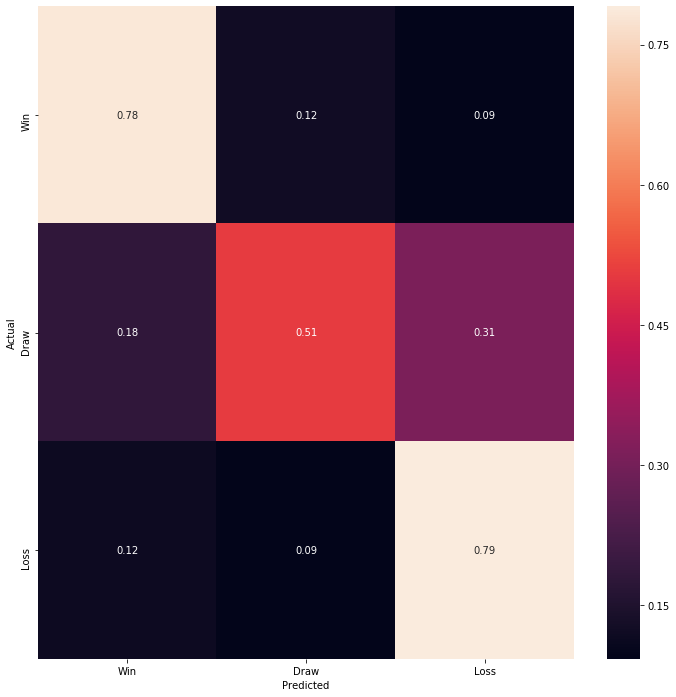

In [28]:
labels = ['Win','Draw','Loss']        
c = confusion_matrix(y_test,preds)
#normalize
cm = c.astype('float')/c.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
#new matplotlib version cuts off part of first and last row, fixing this
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

([<matplotlib.axis.YTick at 0x1ad42ac6808>,
 <a list of 17 Text yticklabel objects>)

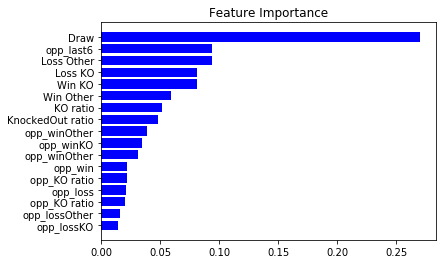

In [29]:
#feature importance
important = rc.feature_importances_
indice = np.argsort(important)
plt.title('Feature Importance')
plt.barh(range(len(indice)),important[indice],color='b',align='center')
plt.yticks(range(len(indice)), [X.columns[i] for i in indice])


In [30]:
#testing XGBoost
X = dataset.drop(['clean_outcome','opp_meta','date','division','gender+division','judge1boxer','judge1opp','judge2boxer','judge2opp','judge3boxer','judge3opp','name','opposition','rating','sex','judge1avg','judge2avg','judge3avg','judge1againstavg','judge2againstavg','judge3againstavg','rounds1','rounds2'],axis=1) 
# X = dataset[['Loss Other','Loss KO','opp_last6','opp_winOther','Draw','opp_winKO','KO ratio','opp_lossOther','opp_KO ratio','opp_lossKO','Win KO','Win Other','avgpts','avgptsagainst']]
# X = dataset.drop(['clean_outcome','rating','judge1opp','judge2boxer','judge1boxer','judge2opp','judge3boxer','judge3opp','name','sex','division','opposition','gender+division','global_id','date','rounds1','rounds2'],axis=1) 
X = X.fillna(0)
y = dataset['clean_outcome']
y = y.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=strat)

In [31]:
#best params
xgb = XGBClassifier()
params = {'min_child_weight':[5,15],
          'subsample':[0.6,0.8,1.0],
          'gamma':[1,5,10,15],
          'learning_rate': [0.01,0.05,0.1],
          'colsample_bytree':[0.6,0.8,1.0],
          'max_depth':[2,3,5,10],
          'n-estimaors': range(50,1000,50)
    }
random_search = RandomizedSearchCV(xgb,params,cv=5,n_iter=5,scoring='f1_weighted',random_state=100)
random_search.fit(X_train,y_train)
# xgbest_params = random_search.best_estimator_

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                   iid='warn', n_iter=5, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [1, 5, 10, 15],
                          

In [32]:
xgb = XGBClassifier(**bestparams,class_weight=class_weight,random_state=1)
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)

In [33]:
score = f1_score(y_test,preds,average='macro')
score

0.645648738099291

In [34]:
#kfold cross validation
kfold = KFold(n_splits=5)
results = cross_val_score(xgb,X_train,y_train,cv=kfold)
results

array([0.85788668, 0.85620214, 0.84793262, 0.854189  , 0.84438658])

In [35]:
#get feature importance
xgb.get_booster().get_score(importance_type="gain")
'Loss Other','Loss KO','opp_last6','opp_winOther','Draw','opp_winKO','KO ratio','opp_lossOther','opp_KO ratio','opp_lossKO','Win KO','Win Other','avgpts','avgptsagainst'

('Loss Other',
 'Loss KO',
 'opp_last6',
 'opp_winOther',
 'Draw',
 'opp_winKO',
 'KO ratio',
 'opp_lossOther',
 'opp_KO ratio',
 'opp_lossKO',
 'Win KO',
 'Win Other',
 'avgpts',
 'avgptsagainst')

Text(0.5, 87.0, 'Predicted')

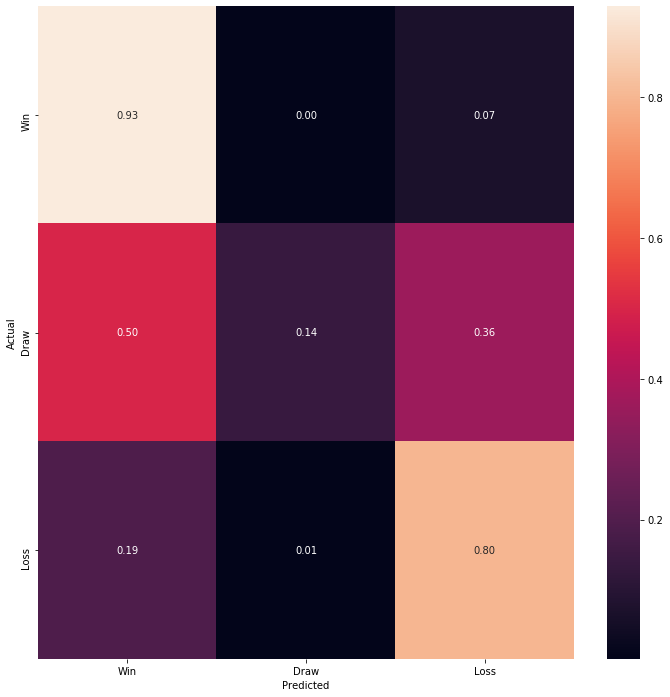

In [36]:
labels = ['Win','Draw','Loss']        
c = confusion_matrix(y_test,preds)
#normalize
cm = c.astype('float')/c.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
#new matplotlib version cuts off part of first and last row, fixing this
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [37]:
#convert back to categorical 
dataset.loc[dataset['clean_outcome'] == 1, 'clean_outcome'] = 'win'
dataset.loc[dataset['clean_outcome'] == 2, 'clean_outcome'] = 'draw'
dataset.loc[dataset['clean_outcome'] == 3, 'clean_outcome'] = 'loss'

In [59]:
from catboost import CatBoostClassifier
import numpy as np
model = CatBoostClassifier
params = {'depth':[2, 3, 4],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg':np.logspace(-20, -19, 3)}
# param = catboost_GridSearchCV(X_train, y_train, X_test, params, cat_features)
cat = CatBoostClassifier(iterations=300,
                         depth=4,
                         learning_rate=0.1,
                         l2_leaf_reg = 3.5,
                         class_weights=[2,25,3],
                         leaf_estimation_iterations = 10)
cat.fit(X_train,y_train)        
y_pred = cat.predict(X_test)
accuracy = f1_score(y_test, y_pred,average='macro')
accuracy
# CatBoostError: To employ param {'use_best_model': True} provide non-empty 'eval_set'.


# {"1":2,"3":4.3,"2":25.1}

0:	learn: 1.0354253	total: 180ms	remaining: 53.8s
1:	learn: 0.9827865	total: 343ms	remaining: 51.1s
2:	learn: 0.9352345	total: 493ms	remaining: 48.8s
3:	learn: 0.9005924	total: 629ms	remaining: 46.5s
4:	learn: 0.8725378	total: 813ms	remaining: 48s
5:	learn: 0.8357129	total: 989ms	remaining: 48.5s
6:	learn: 0.8069957	total: 1.17s	remaining: 49.1s
7:	learn: 0.7885202	total: 1.34s	remaining: 48.9s
8:	learn: 0.7564442	total: 1.47s	remaining: 47.6s
9:	learn: 0.7459448	total: 1.62s	remaining: 47.1s
10:	learn: 0.7358218	total: 1.77s	remaining: 46.5s
11:	learn: 0.7229292	total: 1.92s	remaining: 46s
12:	learn: 0.7101320	total: 2.05s	remaining: 45.3s
13:	learn: 0.7026245	total: 2.22s	remaining: 45.3s
14:	learn: 0.6960754	total: 2.36s	remaining: 44.8s
15:	learn: 0.6890278	total: 2.52s	remaining: 44.7s
16:	learn: 0.6829942	total: 2.67s	remaining: 44.4s
17:	learn: 0.6757470	total: 2.82s	remaining: 44.2s
18:	learn: 0.6706466	total: 2.96s	remaining: 43.9s
19:	learn: 0.6653915	total: 3.13s	remaining: 

162:	learn: 0.5406801	total: 25s	remaining: 21s
163:	learn: 0.5403348	total: 25.1s	remaining: 20.8s
164:	learn: 0.5400606	total: 25.3s	remaining: 20.7s
165:	learn: 0.5399208	total: 25.4s	remaining: 20.5s
166:	learn: 0.5395246	total: 25.6s	remaining: 20.4s
167:	learn: 0.5392920	total: 25.7s	remaining: 20.2s
168:	learn: 0.5390002	total: 25.8s	remaining: 20s
169:	learn: 0.5384210	total: 26s	remaining: 19.9s
170:	learn: 0.5381983	total: 26.1s	remaining: 19.7s
171:	learn: 0.5376240	total: 26.2s	remaining: 19.5s
172:	learn: 0.5372671	total: 26.4s	remaining: 19.4s
173:	learn: 0.5369530	total: 26.5s	remaining: 19.2s
174:	learn: 0.5367813	total: 26.7s	remaining: 19.1s
175:	learn: 0.5363466	total: 26.8s	remaining: 18.9s
176:	learn: 0.5360756	total: 27s	remaining: 18.8s
177:	learn: 0.5358933	total: 27.1s	remaining: 18.6s
178:	learn: 0.5354808	total: 27.3s	remaining: 18.4s
179:	learn: 0.5352255	total: 27.4s	remaining: 18.3s
180:	learn: 0.5351111	total: 27.6s	remaining: 18.1s
181:	learn: 0.5349375	

0.62985958662246

Text(0.5, 87.0, 'Predicted')

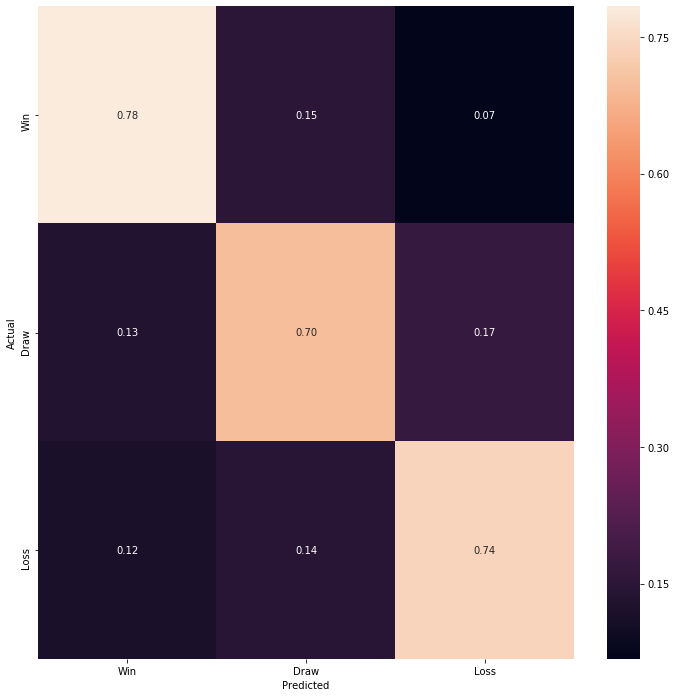

In [60]:
c = confusion_matrix(y_test,y_pred)
#normalize
cm = c.astype('float')/c.sum(axis=1)[:, np.newaxis]
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm,annot=True, fmt= '.2f',xticklabels=labels,yticklabels=labels)
#new matplotlib version cuts off part of first and last row, fixing this
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [61]:
import pickle
import joblib
joblib.dump(cat,"catmodel.pkl")



['catmodel.pkl']

In [62]:
a = dataset[dataset['division'] == 'heavy']
a['name'].unique()

array(['James Jackson', 'Vern Earwood', 'Shawn Gates', 'Ryan Edwards',
       'Allen Campoy Ruiz', 'Eddie Sisneros', 'Jerry Forrest',
       'Ryan Parker', 'Bryan Canady', 'Khalil Brown', 'Lamarco Ellis',
       'Demonte Cherry', 'Demetrius Shaw', 'Styris Horne', 'Thomas Hobbs',
       'Paris Liles', 'Kwasi Horton', 'Danny Kelly', 'Chandler Cole',
       'Mike Balogun', 'Jairus Gladney', 'Nathaniel Copeland',
       'Joel Caudle', 'George Harris', 'Sherman Artis Jr',
       'Princess Hairston', 'Hasim Rahman Jr', 'Nick Kisner',
       'Chandler Whitfield', 'Brian Haneschlager', 'Colby Madison',
       'Quian Davis', 'Jordan Mitchell', 'Satori Ashley',
       'Stefan Talabisco', 'Anthony Caputo Smith', 'Chazz Witherspoon',
       'Joshua Tufte', 'Sahret Delgado', 'Jerome Morris', 'Joey Dawejko',
       'Darmani Rock', 'Sonny Conto', 'Carlette Ewell', 'Yohan Banks',
       'Paul Koon', 'Edward Hood', 'Izim Izbaki', 'Ron Blair',
       'Kendrick Houston', 'Damion Reed', 'Tyrone Williams',